In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import os

In [3]:
from scipy.io import loadmat
output = loadmat(os.path.join('..','tsnmf','data','sonar_output.mat'))

In [4]:
init_W = output['params_all']['init_W'][0,0]
init_H = output['params_all']['init_H'][0,0]
max_iter = output['params_all']['max_iter'][0,0]

In [9]:
%%time
# testing no sparsity, no smoothnes, 1 iteration
import tsnmf
model = tsnmf.smoothNMF(n_components=3, max_iter=10000, betaW=0, betaH=0, smoothness=1)
model.fit(output['LL'], W=init_W, H=init_H, init = 'custom')

# print(LA.norm(output['LL'] - (model.W@model.H)))

Stopping at iteration set in max_iter.
CPU times: user 6min 1s, sys: 11.8 s, total: 6min 12s
Wall time: 1min 41s


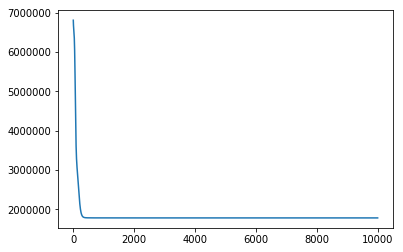

In [10]:
plt.plot(model.cost)

In [11]:
model.W.shape

(15984, 3)

In [12]:
# using tensorly to reshape
import tensorly as tl

In [13]:
model.W.shape

(15984, 3)

In [14]:

# Average across time of day columns
tod_num = 6

In [15]:
W_reshaped = model.W.reshape(3, 144, 37, 3)

In [16]:
LL_reconstructed = (model.W[:,:].reshape([-1,3])@model.H[:,:].reshape([3,-1])).reshape((3,144,37,62))

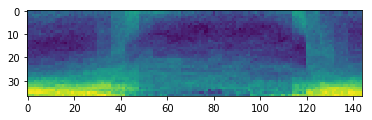

In [17]:
plt.imshow(output["LL"][:,0].reshape(3,144,37)[0,:,:].T)


In [18]:
depth_bin_size = 5
tod_num = 1

Sonar time series reconstructed with 3 components.

<Figure size 1152x324 with 0 Axes>

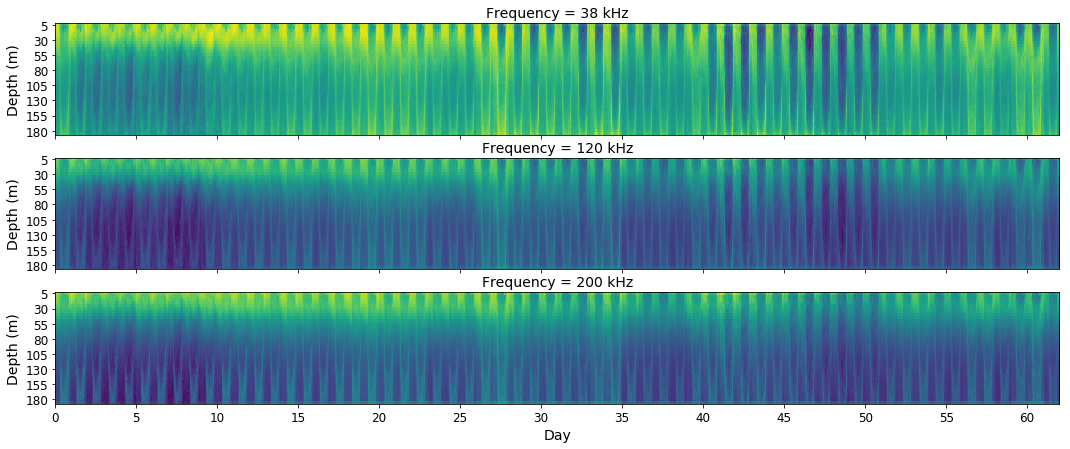

In [19]:
plt.figure(figsize=(16,4.5))
freq = [38,120,200]

fig,ax = plt.subplots(3,1,figsize=(18,7),sharex=True)
for f in range(3):
    ax[f].imshow(tl.unfold(LL_reconstructed.transpose(0,2,3,1)[f,:,:,:],0)[:,:][::-1,:],aspect='auto')
    ax[f].set_xticks(range(0,int(62*144/tod_num),int(144/tod_num*5)))
    ax[f].set_xticklabels(range(0,65,5))
    ax[f].set_yticks(range(0,37,5))
    ax[f].set_yticklabels((np.arange(0,37,5)+1)*depth_bin_size)
    plt.setp(ax[f].get_xticklabels(), fontsize=12)
    plt.setp(ax[f].get_yticklabels(), fontsize=12)
    if ax[f].is_last_row():
        plt.xlabel('Day',fontsize=14)
    ax[f].set_ylabel('Depth (m)',fontsize=14)
    ax[f].set_title('Frequency = %d kHz' % freq[f], fontsize=14)


Sonar time series after PCP.

<Figure size 1152x324 with 0 Axes>

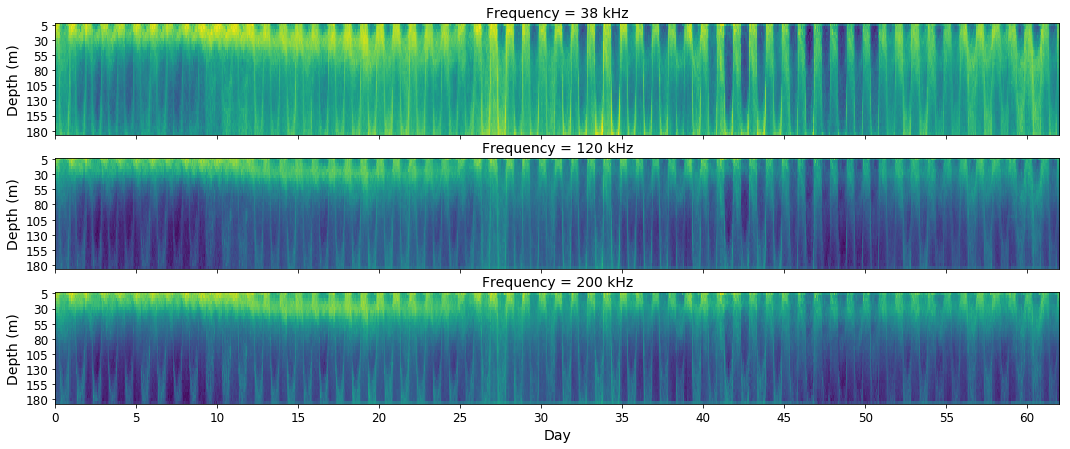

In [20]:
plt.figure(figsize=(16,4.5))
freq = [38,120,200]

fig,ax = plt.subplots(3,1,figsize=(18,7),sharex=True)
for f in range(3):
    ax[f].imshow(tl.unfold(output["LL"].reshape(3,144,37,62).transpose(0,2,3,1)[f,:,:,:],0)[:,:][::-1,:],aspect='auto')
    ax[f].set_xticks(range(0,int(62*144/tod_num),int(144/tod_num*5)))
    ax[f].set_xticklabels(range(0,65,5))
    ax[f].set_yticks(range(0,37,5))
    ax[f].set_yticklabels((np.arange(0,37,5)+1)*depth_bin_size)
    plt.setp(ax[f].get_xticklabels(), fontsize=12)
    plt.setp(ax[f].get_yticklabels(), fontsize=12)
    if ax[f].is_last_row():
        plt.xlabel('Day',fontsize=14)
    ax[f].set_ylabel('Depth (m)',fontsize=14)
    ax[f].set_title('Frequency = %d kHz' % freq[f], fontsize=14)


In [21]:
#freq = [38,120,200]

#fig,ax = plt.subplots(3,1,figsize=(18,7),sharex=True)
#for f in range(3):
#    ax[f].imshow(tl.unfold(tl.tensor(out[:,:,:]),mode=1)[::-1,:],
#                           aspect='auto', vmin=-80, vmax=-40, cmap='jet')
#    ax[f].set_xticks(range(0,int(62*144/tod_num),int(144/tod_num*5)))
#    ax[f].set_xticklabels(range(0,65,5))
#    ax[f].set_yticks(range(0,37,5))
#    ax[f].set_yticklabels((np.arange(0,37,5)+1)*depth_bin_size)
#    plt.setp(ax[f].get_xticklabels(), fontsize=12)
#    plt.setp(ax[f].get_yticklabels(), fontsize=12)
#    if ax[f].is_last_row():
#        plt.xlabel('Day',fontsize=14)
#    ax[f].set_ylabel('Depth (m)',fontsize=14)
#    ax[f].set_title('Frequency = %d kHz' % freq[f], fontsize=14)

In [22]:
# # a function for transforming the data for plotting
# def separate_transform_result(D,ori_data,ping_per_day_mvbs,log_opt=1):
#    '''
#    Separate transformed results into different frequencies and 
#    for use with `plot_cmp_data_decomp` and `plot_single_day`
#    '''
#    D_long = D.reshape((D.shape[0],-1,ori_data.shape[1])).swapaxes(1,2)
#    D_sep = D_long.reshape((D_long.shape[0],D_long.shape[1],-1,ping_per_day_mvbs)).transpose((2,0,1,3))
#    if log_opt==1:
#        D_plot = 10*np.log10(D_sep.transpose((0,2,1,3))).reshape((D_sep.shape[0],D_sep.shape[2],-1))
#    else:
#        D_plot = D_sep.transpose((0,2,1,3)).reshape((D_sep.shape[0],D_sep.shape[2],-1))
#    return D_sep,D_plot

In [23]:
# L_sep, L_plot = separate_transform_result(output['LL'],mvbs,ping_per_day_mvbs,log_opt = 0)

In [24]:
#plt.figure(figsize=(16,4.5))
#plt.imshow(np.moveaxis(output["LL"][:,:].reshape(3,144,37,62),1,2)[0,:,:,:].reshape(37,-1)[:,:500])

In [25]:
#plt.figure(figsize=(16,4.5))
#plt.imshow(np.moveaxis(output["LL"][:,:].reshape(144,37,62),1,2)[0,:,:,:].reshape(37,-1)[:,:500])

In [26]:
#plt.figure(figsize=(16,4.5))
#plt.imshow(np.moveaxis(B[:,:].reshape(3,144,37,62),1,2).reshape(3,37,-1)[2,:,:500])

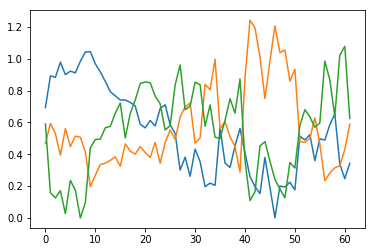

In [27]:
# coefficients in time
plt.plot(model.H.T)

Stopping at iteration set in max_iter.


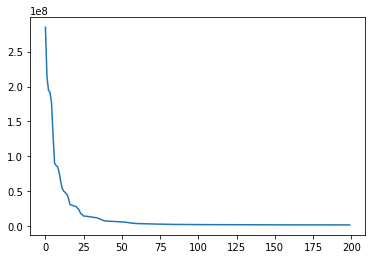

In [29]:
model = tsnmf.smoothNMF(n_components=3, max_iter=200, betaW=0, betaH=0, smoothness=0)
model.fit(output['LL'], W=init_W, H=init_H, init = 'custom')

# print(LA.norm(output['LL'] - (model.W@model.H)))

plt.plot(model.cost)

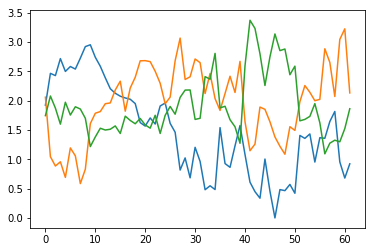

In [30]:
plt.plot(model.H.T)